In [ ]:
!pip install langchain
!pip install  -U langchain-community

In [ ]:

!pip install accelerate #after this restart the session

In [ ]:
!pip install openpyxl
!pip install seaborn

### Domain and Dataset Description for Conference Project

#### Domain: Pitchfork Music Reviews
- **Description**:  
  The domain of this project revolves around the articles and reviews published on **Pitchfork**, a well-known online music publication portal.  
  - Each review on Pitchfork is written by a single reviewer.  
  - The reviewer provides a **total score** for the album and analyzes various aspects such as **lyrics**, **vocals**, and **instrumental components**.  
  - Reviews often include cultural context and references to the artist's previous works.  

#### Dataset: Pitchfork Album Reviews
- **Source**: The dataset is available on **Kaggle** [here](https://www.kaggle.com/datasets/pitchfork-music-reviews).  
- **Description**:  
  The dataset is a comprehensive collection of **album reviews** from Pitchfork, spanning from its early days up to **2023 (inclusive)**.  
  - It includes features such as:  
    - **Artist names**  
    - **Album titles**  
    - **Genre**  
    - **Review dates**  
    - **Scores** (assigned by reviewers)  
    - **Review text** (detailed analysis of the album)  
  - The language of the reviews is **English**.  

#### Project Workflow
1. **Loading Required Libraries and Dataset**:  
   - The first step involves importing necessary Python libraries (e.g., Pandas, NumPy, Matplotlib, etc.) and loading the dataset for analysis.  

This description is structured for clarity and can be used as part of your conference project presentation or documentation at VIT Vellore. Let me know if you need further assistance!

In [ ]:
# Fixed imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import time
import transformers
import torch
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
#This command mounts your Google Drive to the /content/drive directory in the Colab environment.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Load data
data_all = pd.read_excel("pitchfork_reviews.xlsx", sheet_name="Result 1")

In [ ]:
data_all.head()

,artist,album,score,year,reviewer,genre,label,review_date,summary,review,best_new
0,Green-House,A Host for All Kinds of Life,7.6,2023,Hattie Lindert,Electronic / Experimental,Leaving,"October 23, 2023",The Los Angeles ambient musician continues to ...,For proof that we all must ultimately coexist ...,Not Available
1,Tkay Maidza,Sweet Justice,7.6,2023,Dylan Green,Pop/R&B,4AD,"November 3, 2023",The Australian musician chooses herself over t...,Tkay Maidza’s three-partLast Year Was WeirdEP ...,Not Available
2,A Giant Dog,Bite,6.4,2023,Linnie Greene,Rock,Merge,"August 28, 2023","On its first album in six years, the Austin gr...","A Giant Dog’sBite, the Austin, Texas, group’s ...",Not Available
3,Margaret Glaspy,Echo the Diamond,7.7,2023,Marc Hogan,Rock,ATO,"August 23, 2023","On her third album, the Brooklyn musician scra...",Margaret Glaspyhad only a couple of EPs to her...,Not Available
4,Maria BC,Spike Field,7.8,2023,Hannah Jocelyn,Rock / Experimental,Sacred Bones,"October 26, 2023","On their spectral new album, the Oakland music...","Since the 1980s, teams of engineers, anthropol...",Not Available


In [ ]:
data_all.describe()

,artist,album,score,year,reviewer,genre,label,review_date,summary,review,best_new
count,25707,25707,25708,25708,25708,25708,25708,25708,25703,25107,25708
unique,11144,24177,102,65,635,151,7457,6232,24805,25085,3
top,Various Artists,Not Available,7.5,2007,Not Available,Rock,Not Available,Not Available,Not Available,"It was probably overstated, but a few years ag...",Not Available
freq,791,598,1321,1236,1860,8638,600,2945,850,2,24389


In [ ]:
data_all.columns

Index(['artist', 'album', 'score', 'year', 'reviewer', 'genre', 'label',
       'review_date', 'summary', 'review', 'best_new'],
      dtype='object')

In [ ]:
import numpy as np

# Replace "Not Available" with NaN
data_all.replace("Not Available", np.nan, inplace=True)



In [ ]:
len(data_all)

25708

In [ ]:
# Remove rows where 'year' is 'Not Available'
data_all = data_all[data_all['year'] != 'Not Available']

# Drop rows with null values in 'review'
data_all = data_all.dropna(subset=['review'])

# Remove duplicate rows based on 'artist' and 'album'
data_all = data_all.drop_duplicates(subset=['artist', 'album'])

# Drop unnecessary columns
data_all = data_all.drop(columns=['reviewer', 'label', 'best_new', 'review_date'])

# Save cleaned data to CSV
data_all.to_csv('reviews.csv', index=False)

# Assign cleaned data to another variable if needed
data = data_all


In [ ]:

data_all.dropna(inplace=True)

data = data_all
null_counts = data_all.isnull().sum()
print(null_counts)

artist     0
album      0
score      0
year       0
genre      0
summary    0
review     0
dtype: int64


## 1) Number of data entries

In [ ]:
print(len(data))

22097


## 2) Distribution and statistical description of the reviews' lengths in characters.

Text(0, 0.5, 'Frequency')

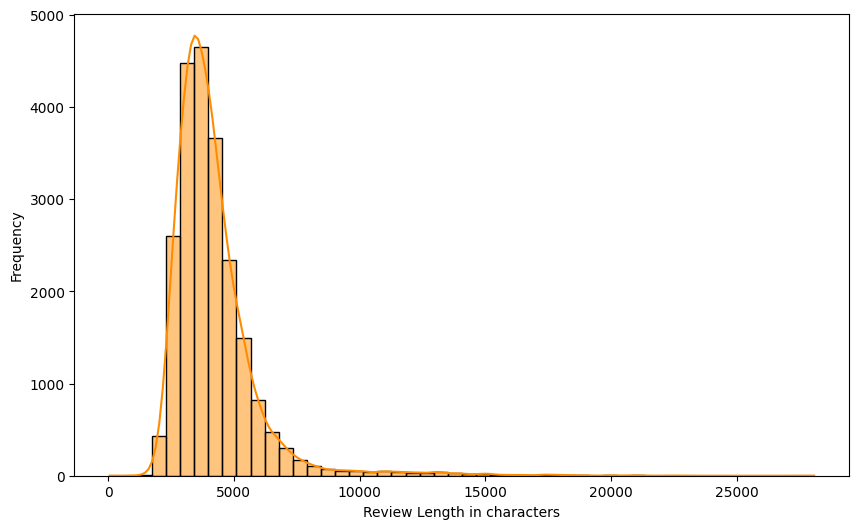

In [ ]:
data['review_length'] = data['review'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], kde=True, bins=50, color='darkorange')
plt.xlabel('Review Length in characters')
plt.ylabel('Frequency')

In [ ]:
print(data["review_length"].describe())

count    22097.000000
mean      4196.259130
std       1752.427939
min         59.000000
25%       3191.000000
50%       3832.000000
75%       4686.000000
max      28075.000000
Name: review_length, dtype: float64


## 3) Distribution of published articles throughout the years

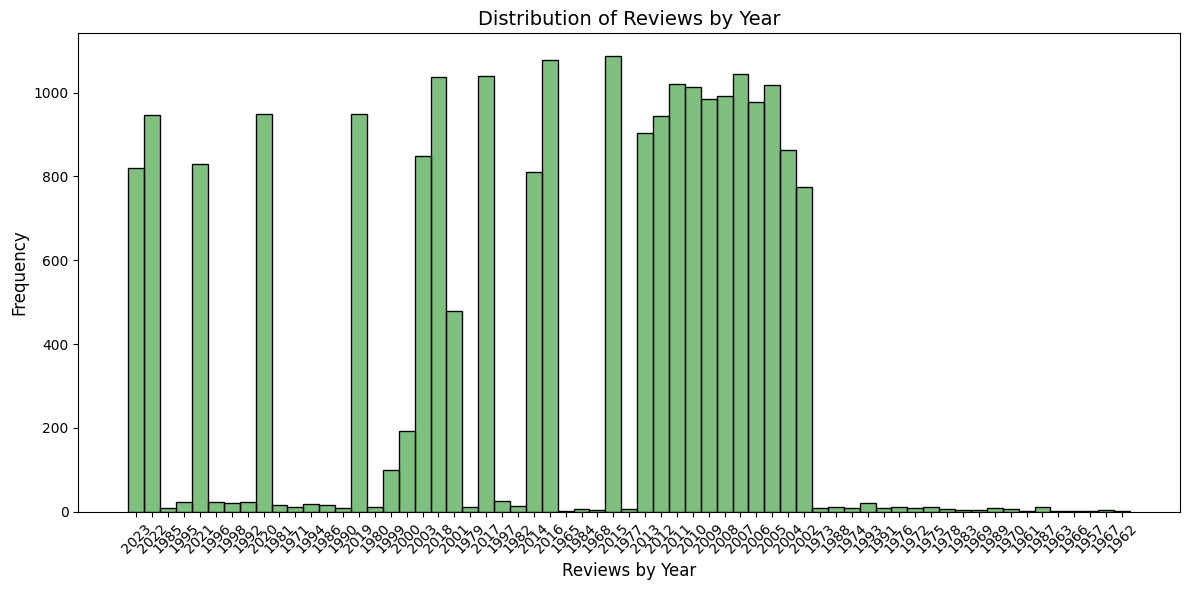

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(data['year'], bins=20, color='green', alpha=0.5)  # Increase bins for better granularity
plt.xlabel('Reviews by Year', fontsize=12)  # Add a clear x-axis label
plt.ylabel('Frequency', fontsize=12)  # Add a clear y-axis label
plt.title('Distribution of Reviews by Year', fontsize=14)  # Add a title

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


## 4) Distribution by music
As it can be seen from the plot below, the two most popular genre of albums considered in reviews are Pop/R&B, Rap and Rock.

<ipython-input-19-1dd546cd373b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=data, y="genre", kind="count", height=10, palette='Set3')


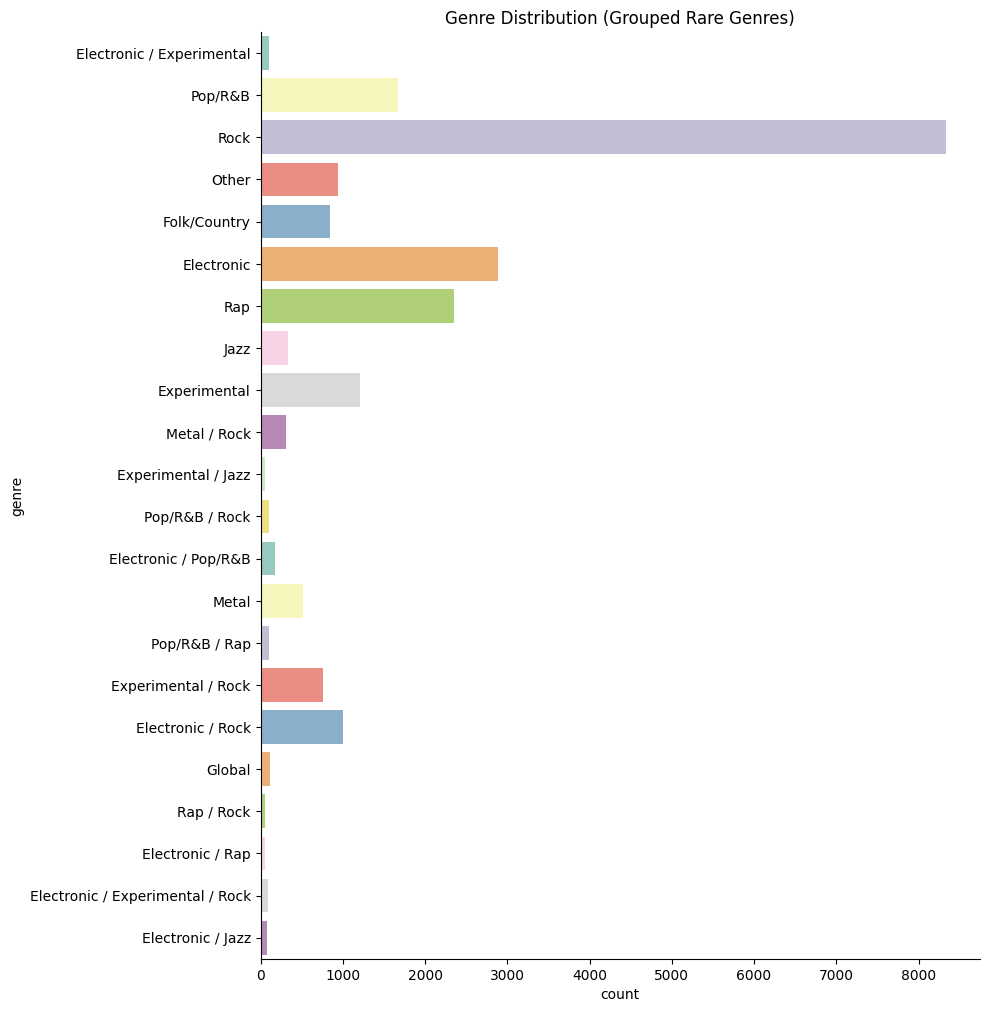

In [ ]:
# Count the occurrences of each genre
genre_counts = data['genre'].value_counts()

# Define a threshold for grouping less frequent genres
threshold = 50  # For example, keep genres with more than 50 occurrences

# Replace rare genres with "Other"
data['genre'] = data['genre'].apply(lambda x: x if genre_counts[x] > threshold else 'Other')

# Plot the updated data
sns.catplot(data=data, y="genre", kind="count", height=10, palette='Set3')
plt.title('Genre Distribution (Grouped Rare Genres)')
plt.show()

## 5) Number of words per article
For this and the folllowing description we use library TextBlob - a library for processing textual data.

In [ ]:
!pip install textblob nltk
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
!python -m textblob.download_corpora


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


Text(0, 0.5, 'Frequency')

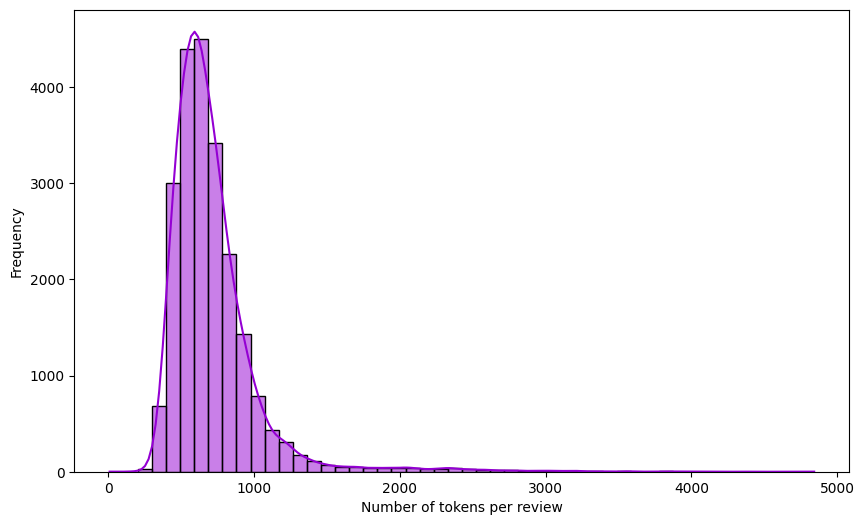

In [ ]:
data['num_tokens'] = data['review'].apply(lambda text: len(TextBlob(text).words))

plt.figure(figsize=(10, 6))
sns.histplot(data['num_tokens'], kde=True, bins=50, color='darkviolet')
plt.xlabel('Number of tokens per review')
plt.ylabel('Frequency')

## 6) Sentiment analysis of each article
Using TextBlob's sentiment analysis tool, we want to see if Pitchfork articles

a) are positive/negative. For this we use value "polarity", which lies in[-1, 1], -1 means negative and 1 means postive sentiment

b) are subjective. For this we use value "subjectivity", which lies in [0, 1], the higher the value, the more subjective review is. Subjectivity parameter shows the amount of personal opinion and factual information contained in the text.

In [ ]:
data['polarity'] = data['review'].apply(lambda text: TextBlob(text).sentiment[0] )

In [ ]:
data['subjectivity'] = data['review'].apply(lambda text: TextBlob(text).sentiment[1] )

<Axes: xlabel='subjectivity', ylabel='Count'>

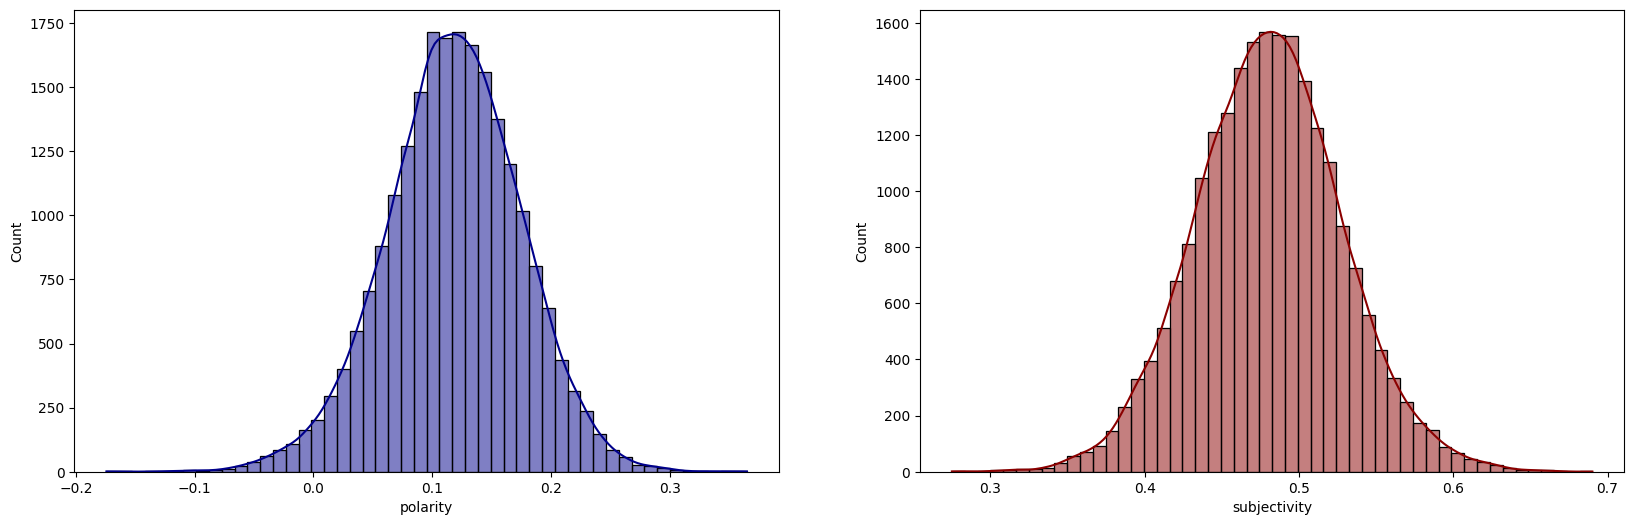

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(20)

sns.histplot(data['polarity'], kde=True, bins=50, color='darkblue', ax=axes[0])
sns.histplot(data['subjectivity'], kde=True, bins=50, color='darkred', ax=axes[1])

As we can see, the positive/negative reviews are well-balanced with a small bias towards postivity. Moreover, reviews contain facts and personal opinions mostly in 50/50 proportion.

Finally, we save the dataset from selected years to a different file, which later will be used as documents for retrieval in our RAG system.

In [ ]:
!pip install langchain

In [ ]:
from langchain.document_loaders import CSVLoader
# Load documents
loader = CSVLoader(file_path="reviews.csv")
rev_data = loader.load()

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: read)

# **Adding embedding model**
We are using LangChain library - a framework designed for developing applications that leverage the power of large language models. This library provides tools and abstractions to enhance customization, accuracy and relevance of generated information.

Components of the library that are particularily useful for our project:

Embedding models create a vector representation of a piece of text.
Vector stores that store embedded data and performing vector search for you.
Retrievers are interfaces that returns documents given an unstructured query. It is more general than a vector store. A retriever does not need to be able to store documents, only to return (or retrieve) them.
Text splitters. LangChain has a number of built-in document transformers that make it easy to split, combine, filter, and otherwise manipulate documents.
Prompt templates help to translate user input and parameters into instructions for a language model
There are a number of useful components and methods of the LangChain llibrary some of them are used later. So we start this part with importing everything that is needed.

**Text → Embedding Model → Vector Store → Retriever → Prompt Template → LLM → Response**

## Key Components  

### 1. Embedding Models  
-  Converts text into numerical vector representations (embeddings).  
- Captures semantic meaning, enabling comparison and analysis of text.  

### 2. Vector Stores  
-  Stores embeddings and performs vector searches.  
-  Efficiently retrieves relevant text via vector similarity.  

### 3. Retrievers  
- *Fetches documents based on unstructured queries.  
- Flexible retrieval without needing to store documents.  

### 4. Text Splitters  
-  Splits large documents into smaller chunks.  
-  Simplifies processing of lengthy texts.  

### 5. Prompt Templates  
-  Formats user input into structured instructions for LLMs.  
-  Improves output quality with consistent prompts.  

---

## Workflow  
1. **Embed Text**: Convert input text into embeddings using an embedding model.  
2. **Store Embeddings**: Save vectors in a vector store.  
3. **Retrieve Documents**: Use a retriever to fetch relevant documents for a query.  
4. **Preprocess Text**: Split large documents into chunks with text splitters.  
5. **Generate Responses**: Format prompts with templates to guide LLM outputs.  

---

In [ ]:
# ====================
# 1. Install Dependencies
# ===================
!pip install -U langchain langchain-community transformers sentence-transformers faiss-cpu bitsandbytes accelerate rank-bm25

In [ ]:
# ====================
# 2. Imports
# ====================
import pandas as pd
import numpy as np
import torch
import transformers
from langchain_community.document_loaders import CSVLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.retrievers import BM25Retriever, EnsembleRetriever
from langchain.chains import ConversationalRetrievalChain
from langchain.prompts import PromptTemplate
from sentence_transformers import CrossEncoder
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

## **1) Separating initial data into chunks**

In [ ]:
# ====================
# 3. Data Loading & Preprocessing
# ====================
# Load dataset
loader = CSVLoader(file_path="reviews.csv")
rev_data = loader.load()

# Text splitting
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=512,
    chunk_overlap=50,
    length_function=len
)
rev_docs = text_splitter.split_documents(rev_data)


In [ ]:
# ====================
# 4. Advanced Retrieval Setup
# ====================
# Embeddings and Vector Store
embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vector_store = FAISS.from_documents(rev_docs, embed_model)
vector_store.save_local("pitchfork_faiss_index")
# Hybrid Retrievers
bm25_retriever = BM25Retriever.from_documents(rev_docs, k=5)
vector_retriever = vector_store.as_retriever(search_kwargs={"k": 5})

ensemble_retriever = EnsembleRetriever(
    retrievers=[vector_retriever, bm25_retriever],
    weights=[0.6, 0.4]
)


<ipython-input-31-b48f5046a835>:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or 

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Since we work with long documents, we need to split them into chunks but to keep semantically related parts of texts together. For that, we use text splitters, that work like this:



1.   Split the text up into small,semantically meaningful chunks
2.   Start combining these small chunks into a larger chunk until you reach a certain size
3. Once you reach that size, make that chunk its own piece of text and then start creating a new chunk of text with some overlap to keep context between chunks

In this step we adjust chunk size to a value, which will lead to a manageable processing time on a vector_store creation.

1. chunk_size variable corresponds to the number of characters in a chunk.

2. chunk_overlap variable is in charge of correlaton between chunks

In [ ]:
# ====================
# 5. LLM & Reranking Setup
# ====================
# Quantized Llama-2 Setup

from langchain.llms import HuggingFacePipeline

llm_model = "mistralai/Mistral-7B-Instruct-v0.2"

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
)

model = AutoModelForCausalLM.from_pretrained(
    llm_model,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)
tokenizer = AutoTokenizer.from_pretrained(llm_model)

# Text Generation Pipeline
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
    temperature=0.1,
    top_p=0.95,
    repetition_penalty=1.15
)
llm = HuggingFacePipeline(pipeline=pipe)

# Reranking Model
cross_encoder = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Device set to use cuda:0
<ipython-input-33-7faf1d8206d0>:35: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=pipe)


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

In [ ]:
# ====================
# 6. Query Processing Components
# ====================
# Replace the existing expand_query function with this:

from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
import pandas as pd # Make sure pandas is imported if not already

def expand_query(query: str) -> str:
    """
    Expands the user query using the LLM to generate related terms and intents.
    Returns a string combining the original query and expanded variations.
    """
    if pd.isna(query) or not isinstance(query, str):
        print(f"expand_query: Received invalid input (type: {type(query)}). Returning empty string.")
        return "" # Return empty string or handle as appropriate

    try:
        # Ensure llm object is accessible here (might need to pass it as argument or make it global/class member)
        # Make sure your llm object is the LangChain wrapper (HuggingFacePipeline in your case)
        # and can be invoked directly or via a simple chain.

        expansion_prompt_template = """
        Given the user query about music: "{query}"
        Generate 3 diverse variations or related queries that capture potential user intents or use synonyms.
        Examples:
        - If the query is "upbeat rock", variations could be "energetic alternative rock", "fast-paced guitar music", "songs similar to Foo Fighters".
        - If the query is "sad jazz", variations could be "melancholic jazz ballads", "music like Chet Baker", "slow tempo bluesy jazz".
        Output ONLY the variations, each on a new line. Do not include the original query in the output.
        Variations:
        """
        prompt = PromptTemplate.from_template(expansion_prompt_template)

        # Simple chain for expansion
        expand_chain = prompt | llm | StrOutputParser() # llm should be your HuggingFacePipeline instance

        expanded_variations = expand_chain.invoke({"query": query}).strip()

        # Combine original query with expanded variations for retrieval
        # Using newline as separator, adjust if your retriever handles it differently
        combined_query_for_retrieval = f"{query}\n{expanded_variations}"

        print(f"Original Query: {query}")
        print(f"Expanded Variations:\n{expanded_variations}")
        print("-" * 20)

        # Return the combined string for the retriever
        return combined_query_for_retrieval

    except Exception as e:
        print(f"Error during LLM query expansion for '{query}': {e}")
        return str(query) # Fallback to original query on error

def rerank_docs(query: str, retrieved_docs: list) -> list:
    """Rerank documents using cross-encoder"""
    pairs = [(query, doc.page_content) for doc in retrieved_docs]
    scores = cross_encoder.predict(pairs)
    return [doc for _, doc in sorted(zip(scores, retrieved_docs), reverse=True)][:3]


In [ ]:
# ====================\n",
# 7. RAG Pipeline Setup\n",
# ====================\n",
from langchain.prompts import PromptTemplate
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory # Ensure Memory is imported

# --- DEFINE the template string cleanly ---
# Triple-check this string for any occurrence of '{alternative}'
prompt_template_string = """### Music Recommendation Task
**User Query:** {question}
**User Context:** {chat_history}

### Analysis Framework
1. Identify key musical elements: instruments, vocals, mood
2. Match to album features from context
3. Consider temporal relevance (release year)
4. Apply genre diversity constraints

### Response Guidelines
- Max 3 recommendations with scores >7/10
- Explicit feature alignment explanation
- Fallback: "Based on your preferences, try exploring new genres or artists."

### Context Data:
{formatted_context}

### Final Answer:
"""

# --- DEFINE the exact input variables expected ---
expected_input_vars = ["question", "chat_history", "formatted_context"]

# --- PRINT the template string to be used ---
print("--- DEBUG: Template String Being Used ---")
print(prompt_template_string)
print("-" * 40)

# --- PRINT the expected input variables ---
print(f"--- DEBUG: Explicitly Defined Input Variables: {expected_input_vars} ---")

# --- Initialize the PromptTemplate ---
try:
    prompt = PromptTemplate(
        template=prompt_template_string,
        input_variables=expected_input_vars,
        # You might add validate_template=False temporarily ONLY for debugging,
        # but it's better to fix the root cause. Let's try without it first.
        # validate_template=True # Default is True
    )
    print("--- DEBUG: PromptTemplate object created successfully ---")

    # --- PRINT the ACTUAL variables the prompt object recognized ---
    print(f"--- DEBUG: ACTUAL Prompt Input Variables AFTER Creation: {prompt.input_variables} ---")

except Exception as prompt_e:
    print(f"!!! ERROR Creating PromptTemplate: {prompt_e}")
    # If this fails, the issue is likely in the template string or input_vars list.
    raise prompt_e # Stop execution if prompt creation fails

# --- Check if 'alternative' is unexpectedly present ---
if 'alternative' in prompt.input_variables:
    print("\n!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("!!! ERROR: 'alternative' is STILL present in prompt.input_variables AFTER creation!")
    print("!!! This indicates an issue with LangChain's PromptTemplate parsing or a hidden character.")
    print("!!! Template used:")
    print(prompt.template) # Print the template it actually used
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n")
    # Depending on the LangChain version, forcing it might work, but it's risky:
    # prompt.input_variables = expected_input_vars
    # print("!!! DEBUG: Forcibly reset input_variables. Re-run Cell [61].")
    # It's better to stop and investigate why it was inferred incorrectly.
    raise ValueError("PromptTemplate incorrectly inferred 'alternative'. Please check template string again.")


# --- Initialize Memory ---
memory = ConversationBufferMemory(
    memory_key="chat_history",
    return_messages=True,
    output_key='answer'
)
print("--- DEBUG: Memory object created ---")


# --- Re-initialize the QA Chain ---
# Assuming llm and ensemble_retriever are correctly defined in previous cells
try:
    qa = ConversationalRetrievalChain.from_llm(
        llm=llm,
        retriever=ensemble_retriever,
        memory=memory,
        combine_docs_chain_kwargs={
            "document_prompt": PromptTemplate(
                input_variables=["page_content"],
                template="{page_content}"
            ),
            "document_variable_name": "formatted_context",
            "prompt": prompt # Pass the corrected prompt object
        },
        return_source_documents=True,
        verbose=True,
    )
    print("--- DEBUG: 'qa' chain object successfully re-initialized ---")
except Exception as chain_e:
    print(f"!!! ERROR Initializing ConversationalRetrievalChain: {chain_e}")
    raise chain_e # Stop execution if chain creation fails

--- DEBUG: Template String Being Used ---
### Music Recommendation Task
**User Query:** {question}
**User Context:** {chat_history}

### Analysis Framework
1. Identify key musical elements: instruments, vocals, mood
2. Match to album features from context
3. Consider temporal relevance (release year)
4. Apply genre diversity constraints

### Response Guidelines
- Max 3 recommendations with scores >7/10
- Explicit feature alignment explanation
- Fallback: "Based on your preferences, try exploring new genres or artists."

### Context Data:
{formatted_context}

### Final Answer:

----------------------------------------
--- DEBUG: Explicitly Defined Input Variables: ['question', 'chat_history', 'formatted_context'] ---
--- DEBUG: PromptTemplate object created successfully ---
--- DEBUG: ACTUAL Prompt Input Variables AFTER Creation: ['chat_history', 'formatted_context', 'question'] ---
--- DEBUG: Memory object created ---
--- DEBUG: 'qa' chain object successfully re-initialized ---


In [ ]:
# ====================\n",
# 8. Test Query Execution\n",
# ====================\n",
import pandas as pd # Make sure pandas is imported

# Assuming expand_query and rerank_docs functions are defined correctly above
# Assuming ensemble_retriever and qa are defined and correctly initialized above

def process_query(query: str):
    print(f"\n--- Processing query: '{query}' ---")
    if pd.isna(query) or not isinstance(query, str):
        print(f"ERROR: Invalid query input (type: {type(query)}). Skipping.")
        return

    # 1. Query expansion (Optional but included in your original code)
    try:
        # Use the original query for expansion, but expanded for retrieval
        expanded_query_for_retrieval = expand_query(query)
    except Exception as exp_e:
        print(f"WARNING: Query expansion failed: {exp_e}. Using original query for retrieval.")
        expanded_query_for_retrieval = query

    # 2. Hybrid retrieval (Using the expanded query)
    try:
        retrieved_docs = ensemble_retriever.get_relevant_documents(expanded_query_for_retrieval)
        print(f"DEBUG: Retrieved {len(retrieved_docs)} documents.")
    except Exception as retr_e:
        print(f"ERROR: Document retrieval failed: {retr_e}")
        retrieved_docs = []

    # 3. Reranking
    reranked_docs = []
    if retrieved_docs:
        try:
            # Rerank using the expanded query to better match context relevance
            reranked_docs = rerank_docs(expanded_query_for_retrieval, retrieved_docs)
            print(f"DEBUG: Reranked documents. Top 3 will be used by chain (implicitly).")
        except Exception as rerank_e:
            print(f"WARNING: Reranking failed: {rerank_e}. Chain will use initial retrieved docs.")
            # Note: The chain uses the *retriever*, not the reranked docs directly unless
            # you explicitly modify the chain's retriever behavior.
            # For simplicity, we let the chain use its configured retriever.
            # The reranking step here mostly informs which docs *could* be best.
    else:
        print("DEBUG: No documents retrieved, skipping reranking.")

    # 4. Generate response using the QA chain
    # *** CRITICAL FIX: Call 'qa' with ONLY the 'question'. ***
    # The chain handles context retrieval and chat history internally via memory.
    result = None
    try:
        print(f"DEBUG: Calling qa chain with question: '{query}'")
        # Pass only the original user question.
        result = qa({"question": query})
        print("DEBUG: qa chain call completed.")
    except ValueError as ve:
        print(f"\n!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print(f"!!! VALUE ERROR during QA chain execution: {ve}")
        print(f"!!! This confirms the chain still expects a missing key.")
        print(f"!!! Most likely cause: Cell [46] (defining prompt/qa) was NOT re-run after code changes.")
        print(f"!!! Please RE-RUN Cell [46] then this cell again.")
        print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n")
        return # Stop processing
    except Exception as e:
        print(f"ERROR during QA chain execution: {e}")
        return # Stop processing

    # 5. Display results
    print(f"\nOriginal Query: {query}")
    # print(f"Expanded Query (used for retrieval): {expanded_query_for_retrieval}") # Optional
    print(f"\nAnswer: {result.get('answer', 'ERROR: No answer found in result.')}")

    print("\nTop Source Documents Provided to LLM:")
    source_docs_used = result.get('source_documents', []) # Get docs from the chain's result
    if source_docs_used:
        for idx, doc in enumerate(source_docs_used[:3]): # Show top 3 used
             print(f"{idx+1}. {doc.page_content[:200]}...")
    else:
        print("No source documents were returned/used by the chain.")
    print(f"--- Finished query: '{query}' ---")


# --- Execute the Test Queries ---
process_query("suggest songs of Taylor Swif")

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



--- Processing query: 'suggest songs of Taylor Swif' ---
Original Query: suggest songs of Taylor Swif
Expanded Variations:
Given the user query about music: "suggest songs of Taylor Swif"
        Generate 3 diverse variations or related queries that capture potential user intents or use synonyms.
        Examples:
        - If the query is "upbeat rock", variations could be "energetic alternative rock", "fast-paced guitar music", "songs similar to Foo Fighters".
        - If the query is "sad jazz", variations could be "melancholic jazz ballads", "music like Chet Baker", "slow tempo bluesy jazz".
        Output ONLY the variations, each on a new line. Do not include the original query in the output.
        Variations:
        1. Recommend popular hits by Taylor Swift
        2. Suggest mellow country tunes from Taylor Swift's discography
        3. Provide a playlist of catchy pop songs by Taylor Swift.
--------------------


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


DEBUG: Retrieved 10 documents.
DEBUG: Reranked documents. Top 3 will be used by chain (implicitly).
DEBUG: Calling qa chain with question: 'suggest songs of Taylor Swif'


> Entering new LLMChain chain...
Prompt after formatting:
Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:

Human: I'm in the mood for something new. Surprise me with a recommendation!
Assistant: ### Music Recommendation Task
**User Query:** I'm in the mood for something new. Surprise me with a recommendation!
**User Context:** 

### Analysis Framework
1. Identify key musical elements: instruments, vocals, mood
2. Match to album features from context
3. Consider temporal relevance (release year)
4. Apply genre diversity constraints

### Response Guidelines
- Max 3 recommendations with scores >7/10
- Explicit feature alignment explanation
- Fallback: "Based on your preferences, try exploring new genres or ar

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.




> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
### Music Recommendation Task
**User Query:** Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:

Human: I'm in the mood for something new. Surprise me with a recommendation!
Assistant: ### Music Recommendation Task
**User Query:** I'm in the mood for something new. Surprise me with a recommendation!
**User Context:** 

### Analysis Framework
1. Identify key musical elements: instruments, vocals, mood
2. Match to album features from context
3. Consider temporal relevance (release year)
4. Apply genre diversity constraints

### Response Guidelines
- Max 3 recommendations with scores >7/10
- Explicit feature alignment explanation
- Fallback: "Based on your preferences, try exploring new genres or artists."

### Context Data:
a pretty good recommendation, but sometimes it stil